In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold 
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, RidgeCV, LassoCV, Ridge, Lasso

%matplotlib inline

In [2]:
# Удалить отступ у строки заголовка
train = pd.read_csv('data/train.csv', sep='\t', index_col=0)
test = pd.read_csv('data/test.csv', sep='\t', index_col=0)
test = test.iloc[:, 1:]       # убираем 0 столбец таргет

seed = 42

In [3]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,336,337,338,339,340,341,342,343,344,345
0,1,1,0,0,0,0,0,0.090909,0,0,...,0.221395,0,1,0,0,0.222222,1,1,1,1
1,1,1,0,0,1,0,0,0.090909,0,0,...,0.241508,0,1,0,0,0.111111,1,1,1,0
2,0,1,0,0,1,0,0,0.090909,0,0,...,0.123067,0,1,0,0,0.444444,1,1,1,1
3,0,1,0,0,1,0,0,0.136364,0,0,...,0.296065,0,0,1,0,0.222222,1,1,1,0
4,0,1,0,0,1,0,0,0.136364,0,0,...,0.178956,0,0,1,0,0.111111,1,1,1,1


In [4]:
test.head()

,1,2,3,4,5,6,7,8,9,10,...,336,337,338,339,340,341,342,343,344,345
0,1,0,0,1,0,0,0.136364,0,0,1,...,0.192984,0,1,0,0,0.222222,1,1,1,1
1,1,0,0,1,0,0,0.181818,0,0,1,...,0.195690,0,1,0,0,0.000000,1,1,1,0
2,1,0,0,0,0,0,0.090909,0,0,1,...,0.192984,0,1,0,0,0.222222,1,1,1,0
3,1,0,0,1,0,0,0.090909,0,0,1,...,0.195690,0,1,0,0,0.000000,1,1,1,0
4,1,0,0,1,0,0,0.090909,0,0,1,...,0.289893,0,0,1,0,0.000000,1,1,1,1


In [116]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30500 entries, 0 to 30499
Columns: 346 entries, 0 to 345
dtypes: float64(106), int64(240)
memory usage: 80.7 MB


In [81]:
train.describe()

,0,1,2,3,4,5,6,7,8,9,...,336,337,338,339,340,341,342,343,344,345
count,30500.000000,30500.000000,30500.000000,30500.000000,30500.000000,30500.000000,30500.000000,30500.000000,30500.000000,30500.000000,...,30500.000000,30500.000000,30500.000000,30500.000000,30500.000000,30500.000000,30500.000000,30500.000000,30500.000000,30500.000000
mean,0.177803,0.977902,0.021934,0.000164,0.437672,0.000623,0.000721,0.096431,0.003344,0.021934,...,0.306157,0.489672,0.401607,0.050426,0.001246,0.085858,0.965934,0.985541,0.953803,0.626230
std,0.382353,0.147006,0.146472,0.012803,0.496108,0.024952,0.026848,0.023719,0.057734,0.146472,...,0.128760,0.499902,0.490231,0.218826,0.035276,0.165875,0.181401,0.119375,0.209914,0.483812
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.090909,0.000000,0.000000,...,0.192617,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.090909,0.000000,0.000000,...,0.281274,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
75%,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.090909,0.000000,0.000000,...,0.450414,1.000000,1.000000,0.000000,0.000000,0.111111,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [123]:
train['0'].value_counts()

0    25077
1     5423
Name: 0, dtype: int64

In [28]:
train['0'].mean()

0.17780327868852458

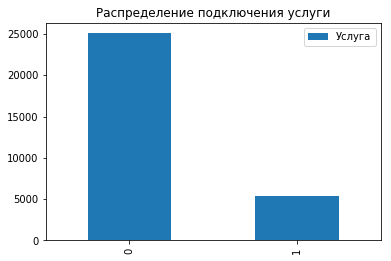

In [136]:
train['0'].value_counts().plot(kind='bar', label='Услуга')
plt.legend()
plt.title('Распределение подключения услуги');

len(np.zeros(4165))

In [27]:
len(range(4166))

4166

In [28]:
d = {'_ID_': range(4166), '_VAL_': np.zeros(4166)}
df = pd.DataFrame(data=d)
df.to_csv('submit.csv', index=False)
df.head()

,_ID_,_VAL_
0,0,0.0
1,1,0.0
2,2,0.0
3,3,0.0
4,4,0.0


In [117]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4166 entries, 0 to 4165
Columns: 345 entries, 1 to 345
dtypes: float64(106), int64(239)
memory usage: 11.0 MB


In [3]:
# Разбиение на трейн и таргет
X = train.iloc[:,1:]
y = train.iloc[:,0]

### Снижение размерности, визуализация

In [5]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [6]:
%%time
tsne = TSNE(random_state=17)
tsne_representation = tsne.fit_transform(X_train)

Wall time: 21min 53s


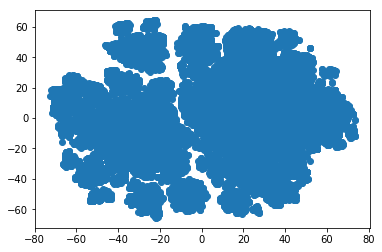

In [7]:
plt.scatter(tsne_representation[:, 0], tsne_representation[:, 1]);

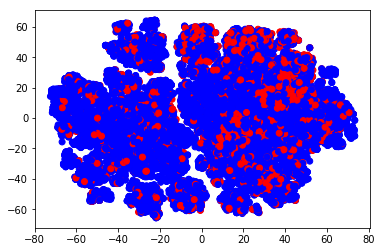

In [8]:
plt.scatter(tsne_representation[:, 0], tsne_representation[:, 1], 
            c=y.map({0: 'blue', 1: 'red'}));

### Дерево решений

In [4]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=seed, shuffle=True, stratify=y)

In [12]:
# Дерево решений
tree = DecisionTreeClassifier(max_depth=5, random_state=seed)
tree.fit(X_train, y_train)
tree_pred = tree.predict(X_val)
roc_auc_score(y_val, tree_pred)

0.53763272394797179

In [13]:
# Метод k ближайших соседей
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_val)
roc_auc_score(y_val, knn_pred)

0.54769332555329409

In [77]:
# Подбор параметров дерева
tree_params = {'max_depth': [50],'max_features': [345]}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
tree_grid = GridSearchCV(tree, tree_params, scoring = 'roc_auc', cv=cv, n_jobs=-1, verbose=True)
tree_grid.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.4s remaining:    6.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.7s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
       error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=40,
            max_features=20, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [50], 'max_features': [345]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=True)

In [78]:
print('Best parameters: ', tree_grid.best_params_)
print('roc_auc_cv: ', tree_grid.best_score_)
print('roc_auc_train: ', roc_auc_score(y_train, tree_grid.predict(X_train)))
print('roc_auc_val: ', roc_auc_score(y_val, tree_grid.predict(X_val)))

Best parameters:  {'max_depth': 50, 'max_features': 345}
roc_auc_cv:  0.564676650641
roc_auc_train:  0.992738589212
roc_auc_val:  0.580734294811


In [50]:
print('Best parameters: ', tree_grid.best_params_)
print('roc_auc_cv: ', tree_grid.best_score_)
print('roc_auc_train: ', roc_auc_score(y_train, tree_grid.predict(X_train)))
print('roc_auc_val: ', roc_auc_score(y_val, tree_grid.predict(X_val)))

Best parameters:  {'max_depth': 10, 'max_features': 345}
roc_auc_cv:  0.632223682429
roc_auc_train:  0.66862865734
roc_auc_val:  0.564960877735


In [67]:
tree_grid.grid_scores_

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.63222, std: 0.01227, params: {'max_depth': 10, 'max_features': 345},
 mean: 0.61634, std: 0.01799, params: {'max_depth': 11, 'max_features': 345},
 mean: 0.60152, std: 0.01731, params: {'max_depth': 12, 'max_features': 345},
 mean: 0.58111, std: 0.01488, params: {'max_depth': 13, 'max_features': 345},
 mean: 0.57349, std: 0.01216, params: {'max_depth': 14, 'max_features': 345},
 mean: 0.55742, std: 0.01400, params: {'max_depth': 15, 'max_features': 345},
 mean: 0.54824, std: 0.00990, params: {'max_depth': 16, 'max_features': 345},
 mean: 0.54105, std: 0.01382, params: {'max_depth': 17, 'max_features': 345},
 mean: 0.53519, std: 0.01176, params: {'max_depth': 18, 'max_features': 345},
 mean: 0.52714, std: 0.00845, params: {'max_depth': 19, 'max_features': 345},
 mean: 0.52644, std: 0.01272, params: {'max_depth': 20, 'max_features': 345},
 mean: 0.52049, std: 0.00945, params: {'max_depth': 21, 'max_features': 345},
 mean: 0.52552, std: 0.00758, params: {'max_depth': 22, 'max_fea

In [71]:
%%time
# Дерево решений
tree = DecisionTreeClassifier(max_depth=50, max_features=345, random_state=seed)
tree.fit(X_train, y_train)
tree_pred = tree.predict(X_val)
tree_pred_train = tree.predict(X_train)
print('roc_auc_val: ', roc_auc_score(y_val, tree_pred))
print('roc_auc_train: ', roc_auc_score(y_train, tree_pred_train))

roc_auc_val:  0.580734294811
roc_auc_train:  0.992738589212
Wall time: 2.52 s


In [72]:
pred_test = tree.predict(test)

In [75]:
d = {'_ID_': range(4166), '_VAL_': pred_test}
df = pd.DataFrame(data=d)
df.head()

,_ID_,_VAL_
0,0,0
1,1,1
2,2,0
3,3,0
4,4,1


In [76]:
df.to_csv('submit.csv', index=False)

In [79]:
# Подбор параметров дерева
tree = DecisionTreeRegressor(random_state=seed)
tree_params = {'max_depth': range(10,60,10),'max_features': [345]}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
tree_grid = GridSearchCV(tree, tree_params, scoring = 'roc_auc', cv=cv, n_jobs=-1, verbose=True)
tree_grid.fit(X_train, y_train)

print('Best parameters: ', tree_grid.best_params_)
print('roc_auc_cv: ', tree_grid.best_score_)
print('roc_auc_train: ', roc_auc_score(y_train, tree_grid.predict(X_train)))
print('roc_auc_val: ', roc_auc_score(y_val, tree_grid.predict(X_val)))

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   14.7s finished


Best parameters:  {'max_depth': 10, 'max_features': 345}
roc_auc_cv:  0.632167145094
roc_auc_train:  0.795871767093
roc_auc_val:  0.641874009308


In [99]:
# Дерево решений
tree = DecisionTreeRegressor(max_depth=6, max_features=10, random_state=seed)
tree.fit(X_train, y_train)
tree_pred = tree.predict(X_val)
tree_pred_train = tree.predict(X_train)
print('roc_auc_train: ', roc_auc_score(y_train, tree_pred_train))
print('roc_auc_val: ', roc_auc_score(y_val, tree_pred))

roc_auc_train:  0.661694195206
roc_auc_val:  0.650230414747


### knn

In [112]:
# Подбор параметров knn
knn = KNeighborsClassifier()
knn_params = {'n_neighbors': range(1, 10)}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
knn_grid = GridSearchCV(knn, knn_params, scoring = 'roc_auc', cv=cv, n_jobs=-1, verbose=True)
knn_grid.fit(X_train, y_train)

In [113]:
knn_grid.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed: 47.2min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
       error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': range(1, 10)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='roc_auc',
       verbose=True)

In [114]:
print('Best parameters: ', knn_grid.best_params_)
print('roc_auc_cv: ', knn_grid.best_score_)
print('roc_auc_train: ', roc_auc_score(y_train, knn_grid.predict(X_train)))
print('roc_auc_val: ', roc_auc_score(y_val, knn_grid.predict(X_val)))

Best parameters:  {'n_neighbors': 9}
roc_auc_cv:  0.678788981951
roc_auc_train:  0.610346997613
roc_auc_val:  0.568126955539


In [115]:
%%time
# Метод k ближайших соседей
knn = KNeighborsClassifier(n_neighbors=10, n_jobs=-1)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_val)
print('roc_auc_train: ', roc_auc_score(y_train, knn.predict(X_train)))
print('roc_auc_val: ', roc_auc_score(y_val, knn_pred))

roc_auc_train:  0.579133593192
roc_auc_val:  0.547693325553
Wall time: 1min 35s


In [116]:
%%time
# Метод k ближайших соседей
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_val)
print('roc_auc_train: ', roc_auc_score(y_train, knn.predict(X_train)))
print('roc_auc_val: ', roc_auc_score(y_val, knn_pred))

roc_auc_train:  0.579133593192
roc_auc_val:  0.547693325553
Wall time: 6min 23s


### Случайный лес

In [130]:
%%time
forest = RandomForestClassifier(n_estimators=1000, max_depth = 50, max_features = 345, n_jobs=-1, random_state=seed)
forest.fit(X_train, y_train)
print('roc_auc_train: ', roc_auc_score(y_train, forest.predict(X_train)))
print('roc_auc_val: ', roc_auc_score(y_val, forest.predict(X_val)))

roc_auc_train:  0.999884739511
roc_auc_val:  0.567360591038
Wall time: 5min 25s


In [131]:
forest = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=seed)
forest_params = {'max_depth': [10,20,30,40,50],'max_features': [345]}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
forest_grid = GridSearchCV(forest, forest_params, scoring = 'roc_auc', cv=cv, n_jobs=-1, verbose=True)
forest_grid.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  8.4min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [10, 20, 30, 40, 50], 'max_features': [345]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=True)

In [132]:
print('Best parameters: ', forest_grid.best_params_)
print('roc_auc_cv: ', forest_grid.best_score_)
print('roc_auc_train: ', roc_auc_score(y_train, forest_grid.predict(X_train)))
print('roc_auc_val: ', roc_auc_score(y_val, forest_grid.predict(X_val)))

Best parameters:  {'max_depth': 10, 'max_features': 345}
roc_auc_cv:  0.722507048529
roc_auc_train:  0.648533357105
roc_auc_val:  0.547598219167


### Логистическая регрессия

In [134]:
logit = LogisticRegression(n_jobs=-1, random_state=seed)
logit.fit(X_train, y_train)
print('roc_auc_train: ', roc_auc_score(y_train, logit.predict(X_train)))
print('roc_auc_val: ', roc_auc_score(y_val, logit.predict(X_val)))

In [65]:
C = np.logspace(-2, 1, 100)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
logit_grid = LogisticRegressionCV(Cs=C, cv=cv, scoring = 'roc_auc', verbose=True, n_jobs=-1)
logit_grid.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  2.3min remaining:  3.5min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.4min finished


LogisticRegressionCV(Cs=array([  0.01   ,   0.01072, ...,   9.32603,  10.     ]),
           class_weight=None,
           cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
           dual=False, fit_intercept=True, intercept_scaling=1.0,
           max_iter=100, multi_class='ovr', n_jobs=-1, penalty='l2',
           random_state=None, refit=True, scoring='roc_auc',
           solver='lbfgs', tol=0.0001, verbose=True)

In [66]:
logit_grid.C_

array([ 0.08111308])

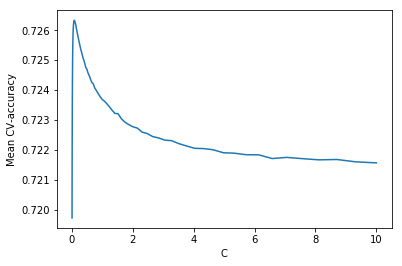

In [67]:
plt.plot(C, np.mean(logit_grid.scores_[1], axis=0))
plt.xlabel('C')
plt.ylabel('Mean CV-accuracy');

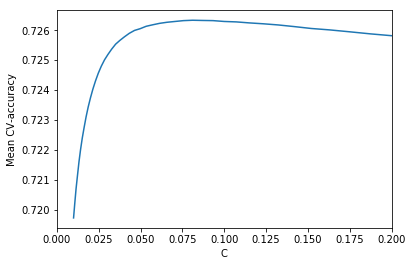

In [68]:
plt.plot(C, np.mean(logit_grid.scores_[1], axis=0))
plt.xlabel('C')
plt.ylabel('Mean CV-accuracy');
plt.xlim((0,0.2));

In [69]:
print('roc_auc_train: ', roc_auc_score(y_train, logit_grid.predict_proba(X_train)[:,1]))
print('roc_auc_val: ', roc_auc_score(y_val, logit_grid.predict_proba(X_val)[:,1]))

roc_auc_train:  0.741349928284
roc_auc_val:  0.724015254507


In [61]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
logit_grid = LogisticRegressionCV(Cs=[0.13], cv=cv, scoring = 'roc_auc', verbose=True, n_jobs=-1)
logit_grid.fit(X_train, y_train)
print('roc_auc_train: ', roc_auc_score(y_train, logit_grid.predict_proba(X_train)[:,1]))
print('roc_auc_val: ', roc_auc_score(y_val, logit_grid.predict_proba(X_val)[:,1]))

[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    3.5s remaining:    5.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.0s finished


roc_auc_train:  0.742594435227
roc_auc_val:  0.724274204465


#### Ridge регрессия

In [56]:
ridge = Ridge(alpha=0.1, random_state=seed)
ridge.fit(X_train, y_train)
print('roc_auc_train: ', roc_auc_score(y_train, ridge.predict(X_train)))
print('roc_auc_val: ', roc_auc_score(y_val, ridge.predict(X_val)))

roc_auc_train:  0.744576759027
roc_auc_val:  0.718327597852


In [ ]:
def frange(start, stop, step):
    i = start
    while i < stop:
        yield i
        i += step

In [70]:
alphas = list(frange(0, 100, 0.1))
ridge_cv = RidgeCV(alphas=alphas, cv=cv, scoring = 'roc_auc')
ridge_cv.fit(X_train, y_train)

RidgeCV(alphas=[0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6, 0.7, 0.7999999999999999, 0.8999999999999999, 0.9999999999999999, 1.0999999999999999, 1.2, 1.3, 1.4000000000000001, 1.5000000000000002, 1.6000000000000003, 1.7000000000000004, 1.8000000000000005, 1.9000000000000006, 2.0000000000000004, 2.100000...9999862, 99.59999999999862, 99.69999999999861, 99.7999999999986, 99.8999999999986, 99.9999999999986],
    cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
    fit_intercept=True, gcv_mode=None, normalize=False, scoring='roc_auc',
    store_cv_values=False)

In [71]:
print('Best parameters: ', ridge_cv.alpha_)
#print('roc_auc_cv: ', forest_grid.best_score_)
print('roc_auc_train: ', roc_auc_score(y_train, ridge_cv.predict(X_train)))
print('roc_auc_val: ', roc_auc_score(y_val, ridge_cv.predict(X_val)))

Best parameters:  73.90000000000008
roc_auc_train:  0.739929317318
roc_auc_val:  0.720589935263


In [74]:
pred_test = ridge_cv.predict(test)

In [75]:
pred_test

array([ 0.11695343,  0.39286592,  0.22152217, ...,  0.00313677,
        0.11124567,  0.23183533])

In [72]:
pred_test = ridge.predict(test)
d = {'_ID_': range(4166), '_VAL_': pred_test}
df = pd.DataFrame(data=d)
df.to_csv('submit.csv', index=False)

In [73]:
df.head()

,_ID_,_VAL_
0,0,0.102637
1,1,0.433846
2,2,0.204976
3,3,0.347068
4,4,0.418889


#### Lasso регрессия

In [88]:
lasso = Lasso(alpha=0.0001, random_state=seed)
lasso.fit(X_train, y_train)
print('roc_auc_train: ', roc_auc_score(y_train, lasso.predict(X_train)))
print('roc_auc_val: ', roc_auc_score(y_val, lasso.predict(X_val)))

roc_auc_train:  0.739673092252
roc_auc_val:  0.7199435794


In [103]:
alphas = np.logspace(-5, -0.5, 50)
lasso_cv = LassoCV(alphas=[0.0001], cv=cv, n_jobs=-1, random_state=seed, verbose=True)
lasso_cv.fit(X_train, y_train)

.....[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.3s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.3s finished


LassoCV(alphas=[0.0001], copy_X=True,
    cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
    eps=0.001, fit_intercept=True, max_iter=1000, n_alphas=100, n_jobs=-1,
    normalize=False, positive=False, precompute='auto', random_state=42,
    selection='cyclic', tol=0.0001, verbose=True)

In [104]:
print('Best parameters: ', lasso_cv.alpha_)
#print('roc_auc_cv: ', forest_grid.best_score_)
print('roc_auc_train: ', roc_auc_score(y_train, lasso_cv.predict(X_train)))
print('roc_auc_val: ', roc_auc_score(y_val, lasso_cv.predict(X_val)))

Best parameters:  0.0001
roc_auc_train:  0.739673092252
roc_auc_val:  0.7199435794


### Градиентный бустинг

In [17]:
gboost = GradientBoostingRegressor(n_estimators=100, max_depth=50, random_state=seed, max_features=345, verbose=1)
gboost.fit(X_train, y_train)
print('roc_auc_train: ', roc_auc_score(y_train, gboost.predict(X_train)))
print('roc_auc_val: ', roc_auc_score(y_val, gboost.predict(X_val)))

      Iter       Train Loss   Remaining Time 
         1           0.1187           17.24m
         2           0.0963           17.23m
         3           0.0781           17.27m
         4           0.0633           17.17m
         5           0.0514           17.04m
         6           0.0416           16.94m
         7           0.0337           16.80m
         8           0.0274           16.72m
         9           0.0222           16.59m
        10           0.0180           16.41m
        20           0.0022           14.74m
        30           0.0003           12.89m
        40           0.0000           11.01m
        50           0.0000            9.15m
        60           0.0000            7.23m
        70           0.0000            5.15m
        80           0.0000            3.05m
        90           0.0000            1.36m
       100           0.0000            0.00s
roc_auc_train:  1.0
roc_auc_val:  0.604391250212


In [21]:
gboost = GradientBoostingRegressor(random_state=seed, verbose=1)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
gboost_params = {'n_estimators': [100],'max_depth': [3],'max_features': [345]}
gboost_cv = GridSearchCV(gboost, gboost_params, scoring = 'roc_auc', cv=cv, n_jobs=-1, verbose=True)
gboost_cv.fit(X_train, y_train)
print('roc_auc_train: ', roc_auc_score(y_train, gboost_cv.predict(X_train)))
print('roc_auc_val: ', roc_auc_score(y_val, gboost_cv.predict(X_val)))

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   18.0s remaining:   27.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   20.1s finished


      Iter       Train Loss   Remaining Time 
         1           0.1444           21.53s
         2           0.1428           21.25s
         3           0.1415           21.14s
         4           0.1403           20.81s
         5           0.1393           19.47s
         6           0.1385           19.53s
         7           0.1377           18.69s
         8           0.1370           18.71s
         9           0.1365           18.12s
        10           0.1359           17.61s
        20           0.1321           14.61s
        30           0.1299           12.23s
        40           0.1285           10.19s
        50           0.1273            8.35s
        60           0.1262            6.53s
        70           0.1253            4.88s
        80           0.1246            3.18s
        90           0.1238            1.58s
       100           0.1231            0.00s
roc_auc_train:  0.774466276488
roc_auc_val:  0.7273571911


In [5]:
gboost = GradientBoostingRegressor(random_state=seed, verbose=1)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
gboost_params = {'n_estimators': [300],'max_depth': [5],'max_features': [100]}
gboost_cv = GridSearchCV(gboost, gboost_params, scoring = 'roc_auc', cv=cv, n_jobs=-1, verbose=True)
gboost_cv.fit(X_train, y_train)
print('roc_auc_train: ', roc_auc_score(y_train, gboost_cv.predict(X_train)))
print('roc_auc_val: ', roc_auc_score(y_val, gboost_cv.predict(X_val)))

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   37.3s remaining:   56.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   39.8s finished


      Iter       Train Loss   Remaining Time 
         1           0.1440           46.03s
         2           0.1418           45.35s
         3           0.1396           45.17s
         4           0.1382           43.30s
         5           0.1368           42.42s
         6           0.1355           43.21s
         7           0.1343           43.10s
         8           0.1333           42.44s
         9           0.1323           42.02s
        10           0.1315           41.61s
        20           0.1258           38.01s
        30           0.1221           34.92s
        40           0.1195           32.78s
        50           0.1171           30.61s
        60           0.1151           29.30s
        70           0.1133           27.75s
        80           0.1115           26.37s
        90           0.1097           25.04s
       100           0.1084           23.44s
       200           0.0957           11.05s
       300           0.0849            0.00s
roc_auc_t

In [22]:
pred_test = gboost_cv.predict(test)
d = {'_ID_': range(4166), '_VAL_': pred_test}
df = pd.DataFrame(data=d)
df.to_csv('submit.csv', index=False)

In [23]:
df.head()

,_ID_,_VAL_
0,0,0.193360
1,1,0.418318
2,2,0.244711
3,3,0.316951
4,4,0.471540


In [ ]:
gboost = GradientBoostingRegressor(random_state=seed, verbose=1)
gboost_params = {'n_estimators':[100],'max_depth': range(10,70,10),'max_features': [345]}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
gboost_cv = GridSearchCV(gboost, gboost_params, scoring = 'roc_auc', cv=cv, n_jobs=-1, verbose=True)
gboost_cv.fit(X_train, y_train)
print('roc_auc_train: ', roc_auc_score(y_train, gboost_cv.predict(X_train)))
print('roc_auc_val: ', roc_auc_score(y_val, gboost_cv.predict(X_val)))

Fitting 5 folds for each of 6 candidates, totalling 30 fits


In [ ]:
# #############################################################################
# Plot training deviance

# compute test set deviance
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(X_test)):
    test_score[i] = clf.loss_(y_test, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

In [8]:
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go

In [12]:
gboost_cv.estimator.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           0.1444           21.20s
         2           0.1428           21.13s
         3           0.1415           20.95s
         4           0.1403           20.66s
         5           0.1393           19.32s
         6           0.1385           19.27s
         7           0.1377           18.40s
         8           0.1370           18.42s
         9           0.1365           17.84s
        10           0.1359           17.35s
        20           0.1321           14.53s
        30           0.1299           12.20s
        40           0.1285           10.15s
        50           0.1273            8.31s
        60           0.1262            6.47s
        70           0.1253            4.83s
        80           0.1246            3.15s
        90           0.1238            1.56s
       100           0.1231            0.00s


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=42,
             subsample=1.0, verbose=1, warm_start=False)

In [15]:
py.init_notebook_mode(connected=True)

In [16]:
gb = gboost_cv.estimator
features = X_train.columns.values
# Scatter plot 
trace = go.Scatter(
    y = gb.feature_importances_,
    x = features,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 13,
        #size= rf.feature_importances_,
        #color = np.random.randn(500), #set color equal to a variable
        color = gb.feature_importances_,
        colorscale='Portland',
        showscale=True
    ),
    text = features
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Gradient Boosting Machine Feature Importance',
    hovermode= 'closest',
     xaxis= dict(
         ticklen= 5,
         showgrid=False,
        zeroline=False,
        showline=False
     ),
    yaxis=dict(
        title= 'Feature Importance',
        showgrid=False,
        zeroline=False,
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')

In [21]:
x, y = (list(x) for x in zip(*sorted(zip(gb.feature_importances_, features), reverse = False)))

In [23]:
y

['117',
 '12',
 '120',
 '124',
 '128',
 '129',
 '130',
 '131',
 '132',
 '133',
 '134',
 '135',
 '137',
 '138',
 '139',
 '14',
 '140',
 '141',
 '143',
 '145',
 '146',
 '148',
 '149',
 '15',
 '150',
 '151',
 '152',
 '153',
 '154',
 '155',
 '156',
 '157',
 '159',
 '16',
 '160',
 '161',
 '162',
 '163',
 '164',
 '166',
 '167',
 '168',
 '169',
 '17',
 '170',
 '172',
 '173',
 '174',
 '175',
 '177',
 '178',
 '179',
 '180',
 '181',
 '182',
 '184',
 '185',
 '186',
 '188',
 '19',
 '191',
 '192',
 '193',
 '195',
 '2',
 '21',
 '212',
 '215',
 '216',
 '217',
 '218',
 '222',
 '224',
 '225',
 '226',
 '228',
 '229',
 '23',
 '230',
 '232',
 '236',
 '237',
 '238',
 '239',
 '24',
 '240',
 '241',
 '242',
 '243',
 '244',
 '245',
 '246',
 '247',
 '248',
 '249',
 '253',
 '254',
 '255',
 '256',
 '257',
 '258',
 '259',
 '26',
 '261',
 '263',
 '264',
 '266',
 '267',
 '269',
 '27',
 '270',
 '271',
 '272',
 '273',
 '275',
 '276',
 '277',
 '278',
 '279',
 '28',
 '280',
 '281',
 '282',
 '284',
 '285',
 '286',
 '287'

In [19]:
x, y = (list(x) for x in zip(*sorted(zip(gb.feature_importances_, features), reverse = False)))
trace2 = go.Bar(
    x=x,
    y=y,
    marker=dict(
        color=x,
        colorscale = 'Viridis',
        reversescale = True
    ),
    name='Gradient Boosting Classifer Feature importance',
    orientation='h',
)

layout = dict(
    title='Barplot of Feature importances',
     width = 900, height = 2000,
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=True,
    ))

fig1 = go.Figure(data=[trace2])
fig1['layout'].update(layout)
py.iplot(fig1, filename='plots')

### LightGBM

In [10]:
# create dataset for lightgbm
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_val, y_val, reference=lgb_train)

In [72]:
# specify your configurations as a dict
params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': {'auc'},
    'num_leaves': 40,
    'learning_rate': 0.05,
    'feature_fraction': 0.7,
    'bagging_fraction': 0.8,
    'bagging_freq': 6,
    'verbose': 0
}

print('Start training...')
# train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=100,
                valid_sets=lgb_eval,
                early_stopping_rounds=10)

Start training...
[1]	valid_0's auc: 0.678007
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's auc: 0.686122
[3]	valid_0's auc: 0.696682
[4]	valid_0's auc: 0.698107
[5]	valid_0's auc: 0.702725
[6]	valid_0's auc: 0.703463
[7]	valid_0's auc: 0.707056
[8]	valid_0's auc: 0.708888
[9]	valid_0's auc: 0.71128
[10]	valid_0's auc: 0.713086
[11]	valid_0's auc: 0.71193
[12]	valid_0's auc: 0.712323
[13]	valid_0's auc: 0.712439
[14]	valid_0's auc: 0.713179
[15]	valid_0's auc: 0.715232
[16]	valid_0's auc: 0.715971
[17]	valid_0's auc: 0.717293
[18]	valid_0's auc: 0.717431
[19]	valid_0's auc: 0.718264
[20]	valid_0's auc: 0.718501
[21]	valid_0's auc: 0.719229
[22]	valid_0's auc: 0.719233
[23]	valid_0's auc: 0.719624
[24]	valid_0's auc: 0.720127
[25]	valid_0's auc: 0.720597
[26]	valid_0's auc: 0.721665
[27]	valid_0's auc: 0.722941
[28]	valid_0's auc: 0.723422
[29]	valid_0's auc: 0.724028
[30]	valid_0's auc: 0.724379
[31]	valid_0's auc: 0.725277
[32]	valid_0's auc: 0.725734
[33

In [69]:
print('roc_auc_train: ', roc_auc_score(y_train, gbm.predict(X_train)))
print('roc_auc_val: ', roc_auc_score(y_val, gbm.predict(X_val)))

roc_auc_train:  0.828367422907
roc_auc_val:  0.734419874018


In [73]:
pred_test = gbm.predict(test)
d = {'_ID_': range(4166), '_VAL_': pred_test}
df = pd.DataFrame(data=d)
df.to_csv('submit.csv', index=False)

In [74]:
df.head()

,_ID_,_VAL_
0,0,0.114690
1,1,0.457514
2,2,0.288809
3,3,0.347165
4,4,0.502915
